https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [75]:
import pandas as pd

df = pd.read_csv('/home/yusuf/Masaüstü/Machine-learning/data/house_data.csv')

**eda**

In [76]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [77]:
df.shape

(13320, 9)

In [78]:
df.drop(['area_type','availability','society'], axis = 1, inplace = True)

In [79]:
df.shape

(13320, 6)

In [80]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [81]:
df.dropna(inplace = True)
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [82]:
df.size

76260

In [84]:
df['size'].apply(lambda x: int(x.split(' ')[0]))

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12710, dtype: int64

In [85]:
df['numbers_of_room'] = df['size'].apply(lambda x: int(x.split(' ')[0])) #oda sayıları outlier olabilir onu son aşamada kontrol etmeyi unutma

In [86]:
for i in df['total_sqft']:
    print(i)

1056
2600
1440
1521
1200
1170
1310
1800
2785
1000
1100
2250
1175
1180
1540
2770
1100
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
700
1070
1724
1290
1143
1254
600
660
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
1200
1500
1407
840
4395
845
5700
1160
3000
1100
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
1326
1325
1499
3000
1665
708
1060
710
1000
1000
1450
1200
1296
1540
2894
1330
1200
1200
2502
650
2400
1007
1200
966
1630
1640
782
1260
1800
1413
1116
1530
3700
2497
1540
1436
1100
276
1427
2061
3067 - 8156
2650
1282
1050
1600
945
1500
950
1870
1600
880
1200
1535
950
1360
1042 - 1105
1280
1260
3050
1563.05
1000
1167
4000
890
1612
1710
957
1250
1125
1020
1200
1735
2050
3750
1350
1063
1904
4200
2000
1145 - 1340
1425
1500
1060
1470
1300
450
1152
1350
1550
1500
600
400
705
770
1242
1700
2144
1704
1070
1846
1340
1025
1015 - 1540
1200
2250
1550
1800
1200
1327
1186
1783
1400
980
1285
912
1225
1075
1260
1282
1909
1359
1207
1736
2850
1

In [87]:
def isNumber(x):
    try:
        float(x)
    except:
        return False
    return True


In [88]:
df2 = df[df['total_sqft'].apply(isNumber)==False]
df2.head()

,location,size,total_sqft,bath,balcony,price,numbers_of_room
30,Yelahanka,4 BHK,2100 - 2850,4.00,0.00,186.00,4
122,Hebbal,4 BHK,3067 - 8156,4.00,0.00,477.00,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00,0.00,54.01,2
165,Sarjapur,2 BHK,1145 - 1340,2.00,0.00,43.49,2
188,KR Puram,2 BHK,1015 - 1540,2.00,0.00,56.80,2


In [89]:
df2['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

In [90]:
df2[df2['total_sqft'].str.contains('Meter')].count()

location           17
size               17
total_sqft         17
bath               17
balcony            17
price              17
numbers_of_room    17
dtype: int64

In [92]:
def convert_to_num(x):
    numbers = str(x).split('-')
    if len(numbers)==2:
        res = (float(numbers[0]) + float(numbers[1])) // 2
    else:
        try:
            res = float(x)

        except:
            res = None
    return res
    

In [93]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_num)

In [94]:
df.head()

,location,size,total_sqft,bath,balcony,price,numbers_of_room
0,Electronic City Phase II,2 BHK,1056.00,2.00,1.00,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,3.00,120.00,4
2,Uttarahalli,3 BHK,1440.00,2.00,3.00,62.00,3
3,Lingadheeranahalli,3 BHK,1521.00,3.00,1.00,95.00,3
4,Kothanur,2 BHK,1200.00,2.00,1.00,51.00,2


sqft'i metreye cevirecegiz 1 sqft = 0.930 m

In [95]:
df['m2'] = df['total_sqft'] * 0.09290304

In [170]:
df3 = df.copy()

In [171]:
df3['price_per_m2'] = df3['price'] * 1_000 / df3['m2'] #feature engineering için kullanılacak

In [172]:
df3

,location,size,total_sqft,bath,balcony,price,numbers_of_room,m2,price_per_m2
0,Electronic City Phase II,2 BHK,1056.00,2.00,1.00,39.07,2,98.11,398.24
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,3.00,120.00,4,241.55,496.80
2,Uttarahalli,3 BHK,1440.00,2.00,3.00,62.00,3,133.78,463.45
3,Lingadheeranahalli,3 BHK,1521.00,3.00,1.00,95.00,3,141.31,672.30
4,Kothanur,2 BHK,1200.00,2.00,1.00,51.00,2,111.48,457.47
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.00,3.00,3.00,112.00,3,159.33,702.95
13315,Whitefield,5 Bedroom,3453.00,4.00,0.00,231.00,5,320.79,720.09
13317,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,1.00,60.00,2,106.00,566.03
13318,Padmanabhanagar,4 BHK,4689.00,4.00,1.00,488.00,4,435.62,1120.24


In [66]:
pd.options.display.float_format = '{:.2f}'.format


In [173]:
len(df3['location'].unique())


1265

In [174]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1265,), dtype=object)

In [175]:
df3['location'] = df3['location'].apply(lambda x: x.strip())


In [176]:
len(df3['location'].unique())

1254

In [177]:
loc_stats = df3.groupby(['location'])['location'].size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
loc_stats

,location,counts
1200,Whitefield,515
993,Sarjapur Road,372
391,Electronic City,302
633,Kanakpura Road,261
1099,Thanisandra,234
...,...,...
1239,mvj engineering college,1
1238,manyata tech park,1
1236,manyata,1
1235,kg halli jalhalli west,1


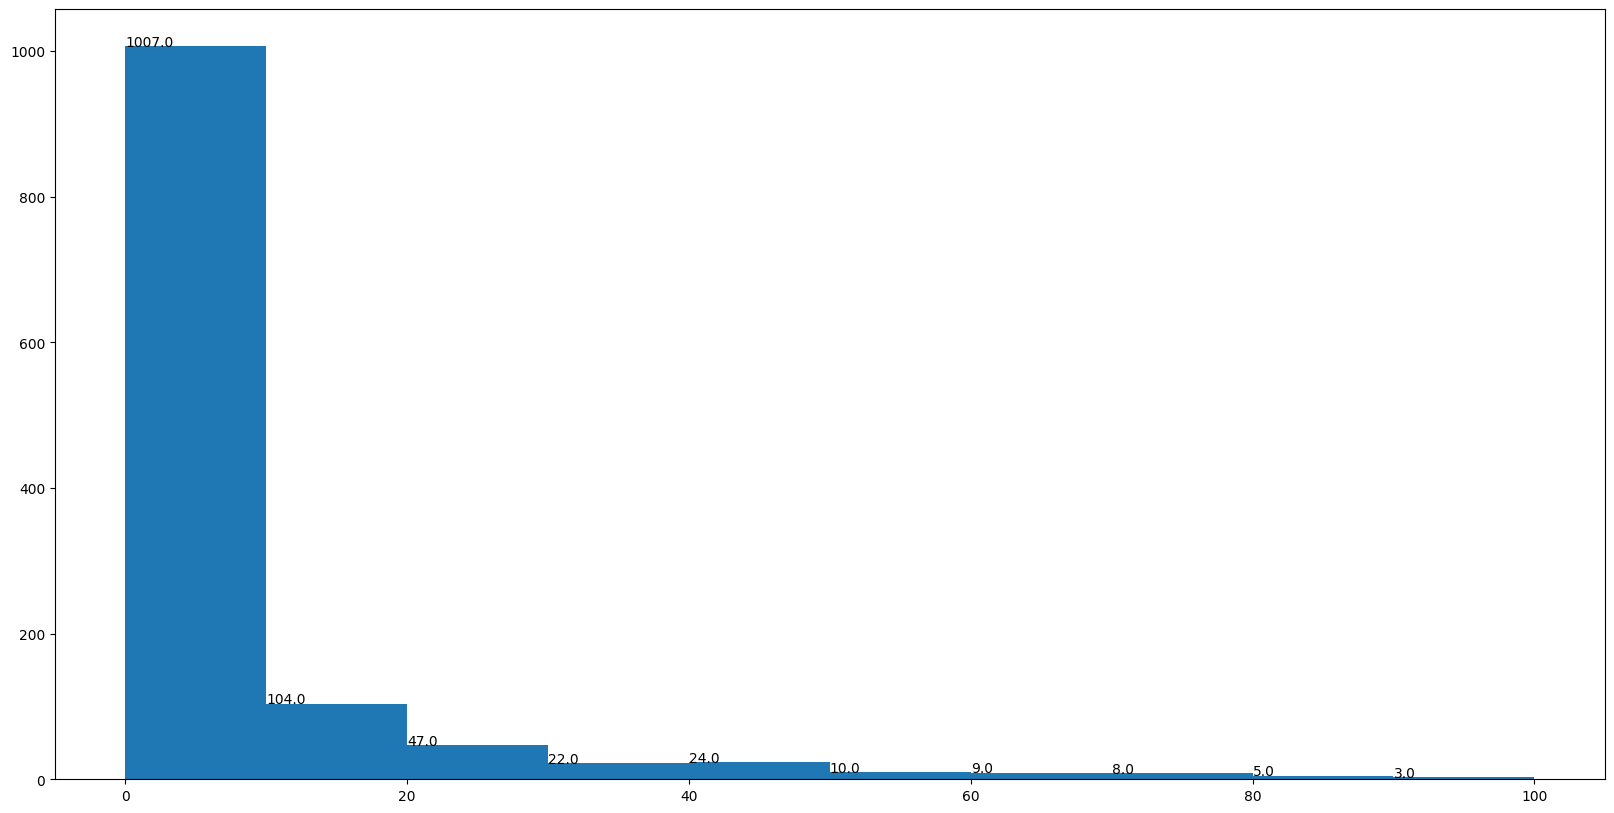

In [178]:
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
bins = 10
data = loc_stats.counts
arr = plt.hist(data, bins=bins, range=(0,100))
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [179]:
print(len(loc_stats[loc_stats.counts<=10]))
less_than_10 = loc_stats[loc_stats.counts<=10]
less_than_10

1017


,location,counts
197,Basapura,10
459,Gunjur Palya,10
331,Dairy Circle,10
460,HAL 2nd Stage,10
612,Kalkere,10
...,...,...
1239,mvj engineering college,1
1238,manyata tech park,1
1236,manyata,1
1235,kg halli jalhalli west,1


In [180]:
df3['location'] =  df3['location'].apply(lambda x: 'other' if x in less_than_10['location'].to_list() else x)

In [181]:
df3['location'].value_counts()

location
other               2739
Whitefield           515
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       261
                    ... 
Marsur                11
Karuna Nagar          11
Prithvi Layout        11
Doddaballapur         11
Thyagaraja Nagar      11
Name: count, Length: 238, dtype: int64

**outlier removing**

In [182]:
df3 = df3[~(df3['total_sqft']/df3['numbers_of_room']<300)]
df3.shape

(12055, 9)

In [183]:
def remove_ppm_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df3.groupby('location'):
        lower_limit = subdf.price_per_m2.mean() - ( 1 * subdf.price_per_m2.std() )
        upper_limit = subdf.price_per_m2.mean() + ( 1 * subdf.price_per_m2.std() )
        
        reduced_df = subdf[(subdf.price_per_m2>lower_limit) & (subdf.price_per_m2<upper_limit)]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

In [184]:
df3 = remove_ppm_outliers(df3)
df3.shape

(9895, 9)

In [187]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df['numbers_of_room']==2)]
    bhk3 = df[(df.location==location) & (df['numbers_of_room']==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

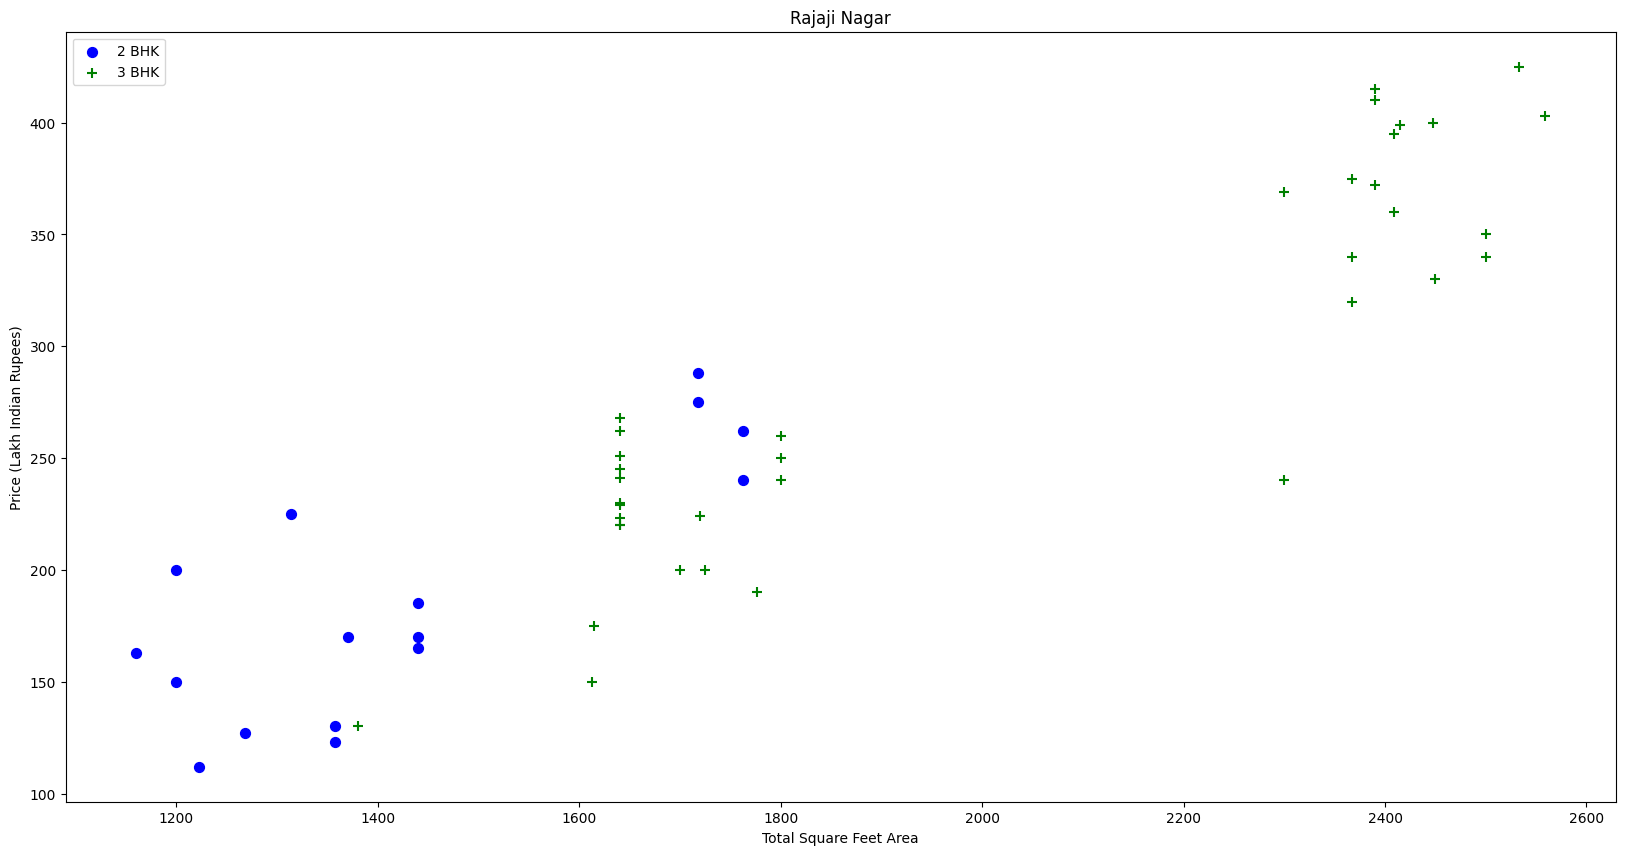

In [188]:
plot_scatter_chart(df3,"Rajaji Nagar")


In [193]:
import numpy as np
def remove_oda_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        oda_stats = {}
        for oda, oda_df in location_df.groupby('numbers_of_room'):
            oda_stats[oda] = {
                'mean': np.mean(oda_df.price_per_m2),
                'std': np.std(oda_df.price_per_m2),
                'count': oda_df.shape[0]
            }
        for oda, oda_df in location_df.groupby('numbers_of_room'):
            stats = oda_stats.get(oda-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, oda_df[oda_df.price_per_m2<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [194]:
df4 = remove_oda_outliers(df3)
df4.shape


(7066, 9)

Text(0, 0.5, 'Count')

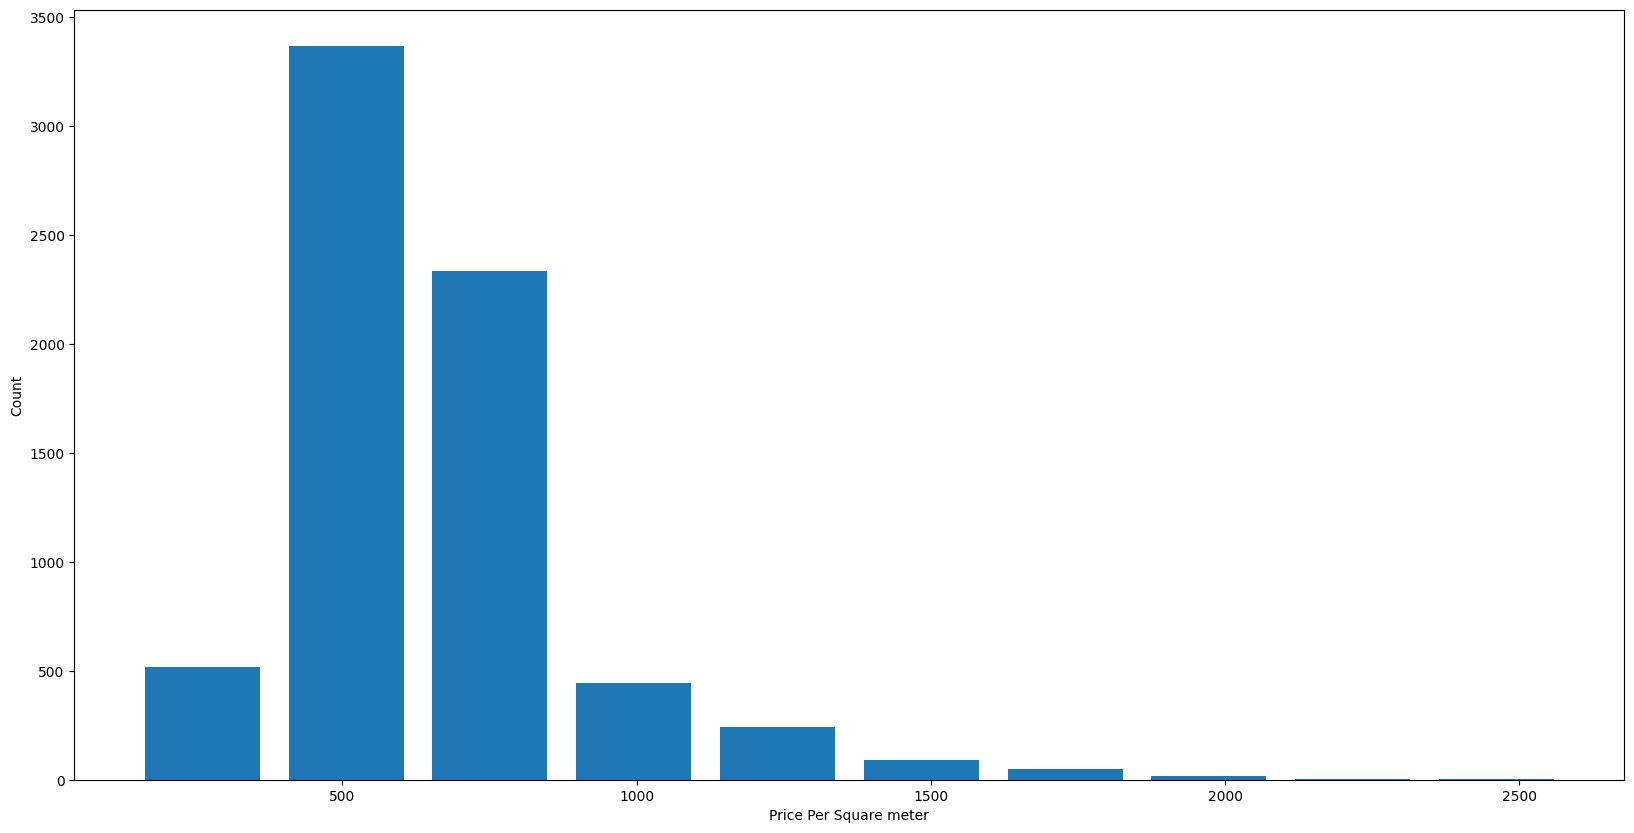

In [197]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_m2,rwidth=0.8)
plt.xlabel("Price Per Square meter")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

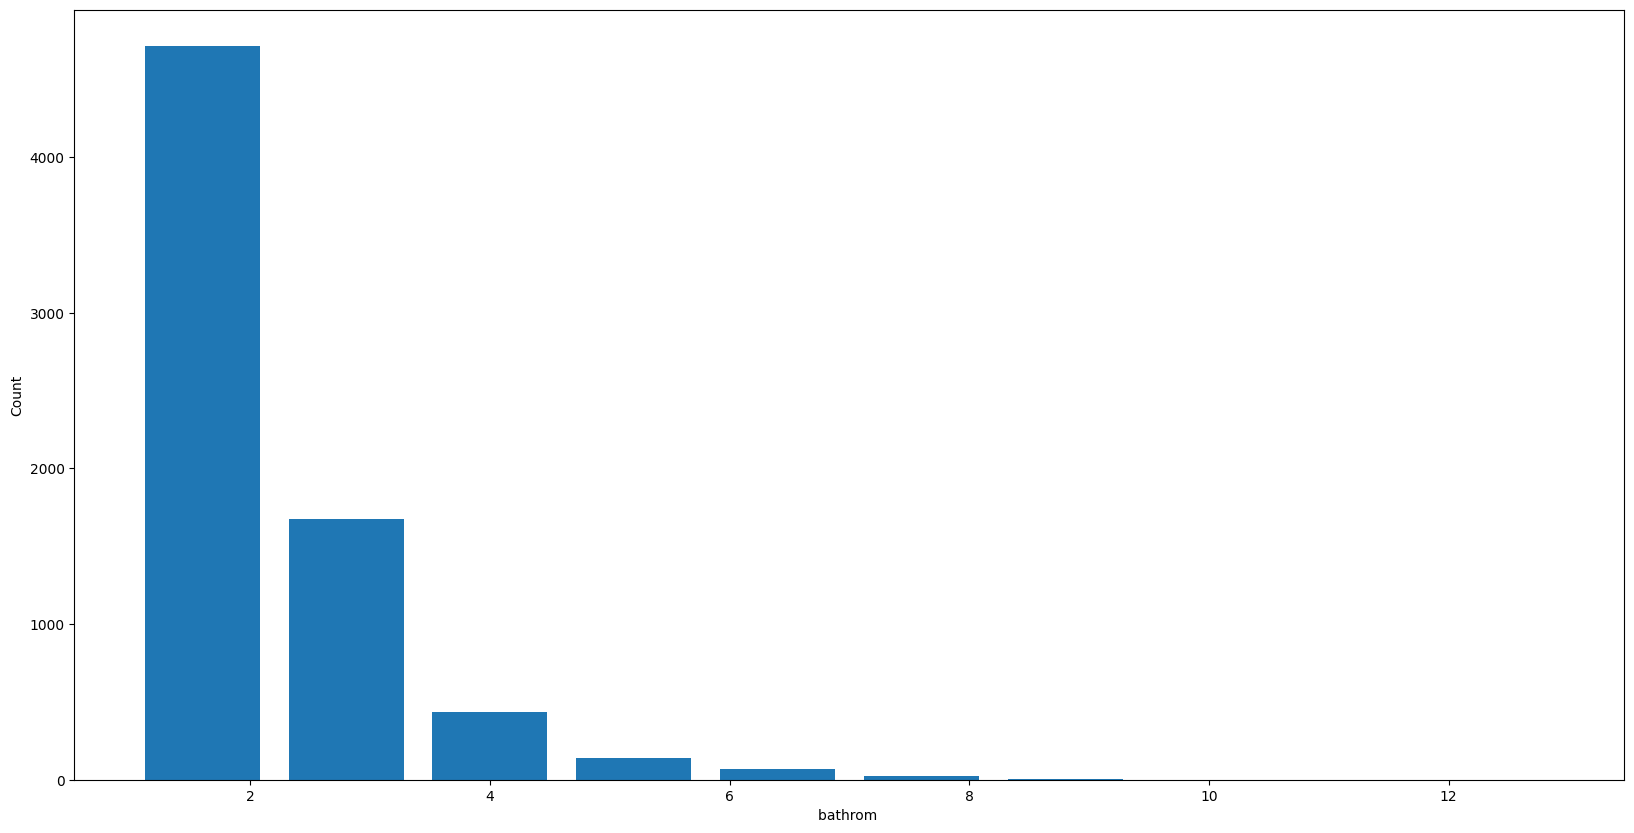

In [199]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("bathrom ")
plt.ylabel("Count")

In [201]:
#her odada bir tane banyo oldugunu düsünürsek en fazla 1 fazlasına izin verelim
df5 = df4[df4.numbers_of_room<df4.bath+2]
df5

,location,size,total_sqft,bath,balcony,price,numbers_of_room,m2,price_per_m2
0,1st Block Jayanagar,4 BHK,2850.00,4.00,1.00,428.00,4,264.77,1616.47
1,1st Block Jayanagar,3 BHK,1630.00,3.00,2.00,194.00,3,151.43,1281.10
2,1st Block Jayanagar,3 BHK,1875.00,2.00,3.00,235.00,3,174.19,1349.08
3,1st Block Jayanagar,3 BHK,1200.00,2.00,0.00,130.00,3,111.48,1166.09
4,1st Block Jayanagar,2 BHK,1235.00,2.00,2.00,148.00,2,114.74,1289.93
...,...,...,...,...,...,...,...,...,...
9885,other,2 BHK,1155.00,2.00,1.00,64.00,2,107.30,596.44
9887,other,2 BHK,1200.00,2.00,3.00,70.00,2,111.48,627.89
9888,other,1 BHK,1800.00,1.00,1.00,200.00,1,167.23,1195.99
9891,other,2 BHK,1353.00,2.00,2.00,110.00,2,125.70,875.11


In [203]:
df5.bath.value_counts()

bath
2.00     4130
3.00     1667
1.00      564
4.00      432
5.00      142
6.00       70
7.00       17
8.00       10
9.00        4
13.00       1
Name: count, dtype: int64

In [204]:
df5.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'numbers_of_room', 'm2', 'price_per_m2'],
      dtype='object')

In [205]:
df5.drop(['balcony','price_per_m2','m2'],axis=1,inplace = True)
df5.head()

/tmp/ipykernel_3249/2436842761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['balcony','price_per_m2','m2'],axis=1,inplace = True)


,location,size,total_sqft,bath,price,numbers_of_room
0,1st Block Jayanagar,4 BHK,2850.00,4.00,428.00,4
1,1st Block Jayanagar,3 BHK,1630.00,3.00,194.00,3
2,1st Block Jayanagar,3 BHK,1875.00,2.00,235.00,3
3,1st Block Jayanagar,3 BHK,1200.00,2.00,130.00,3
4,1st Block Jayanagar,2 BHK,1235.00,2.00,148.00,2


**encoding**

In [209]:
df5.location = df5.location.str.lower().str.strip()


/tmp/ipykernel_3249/2327839333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.str.lower().str.strip()


In [226]:
df_encoded = pd.get_dummies(df5, columns=['location'], drop_first=True, prefix='', prefix_sep='')


In [227]:
df_encoded.drop(columns='size', inplace = True)
df_encoded.head()


,total_sqft,bath,price,numbers_of_room,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.00,4.00,428.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.00,3.00,194.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.00,2.00,235.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.00,2.00,130.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.00,2.00,148.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_encoded['total_sqft'] =  scaler.fit_transform(df_encoded[['total_sqft']])
X = df_encoded.drop(columns='price')
y = df_encoded.price


In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)

In [233]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

lr.score(X_test, y_test)

0.8646230810334018

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

print(f'''
RMSE: {root_mean_squared_error(y_test,lr.predict(X_test))}
MSE:  {mean_squared_error(y_test, lr.predict(X_test))}
''')



RMSE: 27.372776968720093
MSE:  749.2689189792931



In [237]:
27,37**27,37

(27, 2195060778453276448585190172728648509121533, 37)